In [ ]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!pip install pytesseract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install nltk
!pip3 install nltk
!pip install image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
antiword is already the newest version (0.37-16).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-15 10:05:20.266328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow 

CODE

In [ ]:
#Reading the data
from google.colab import drive
import os
import textract
import pandas as pd

#Cleaning the data
import re
import string

#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import  Counter
from nltk import ngrams

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer 

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

#Wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import image

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.listdir('/content/drive/MyDrive/SampleDataset')

['1.pdf',
 '12.pdf',
 '11.pdf',
 '13.pdf',
 '10.pdf',
 '18.pdf',
 '19.pdf',
 '20.pdf',
 '21.docx',
 '2.pdf',
 '15.pdf',
 '17.pdf',
 '16.pdf',
 '4.pdf',
 '26.jfif',
 '22.docx',
 '25.jfif',
 '29.jfif',
 '30.png',
 '24.png',
 '28.jpeg',
 '27.jpg',
 '5.pdf',
 '8.pdf',
 '6.pdf',
 '7.pdf',
 '9.pdf',
 'mask12.png']

In [ ]:
file_path1 = []

directory1 = '/content/drive/MyDrive/SampleDataset'
for i in os.listdir(directory1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory1, i)
    file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))

In [ ]:
df = pd.DataFrame(file_path1)
df.set_axis(['Resumes'],axis='columns',inplace=True)
df.shape
# # df[1:2]
# df[df.apply(lambda row: row.astype(str).str.contains('E X P E R I E N C E',case=False).any(),axis=1)]

# df[df.apply(lambda row: row.astype(str).str.contains('experience',case=False).any(),axis=1)]

<ipython-input-7-4a72a25f07c2>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Resumes'],axis='columns',inplace=True)


(20, 1)

Shows the histogram with total length of words in all resumes

<Axes: >

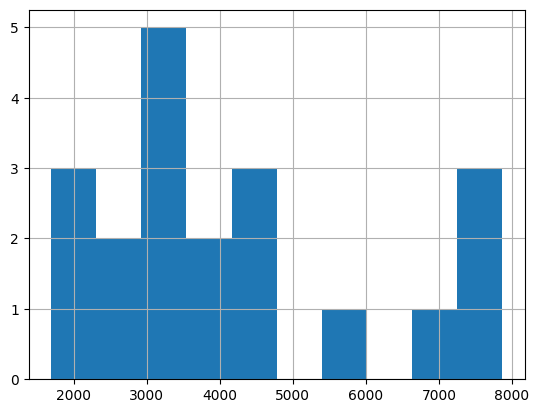

In [ ]:
df['Resumes'].str.len().hist()

Shows the histogram of individual word length in all resumes

<Axes: >

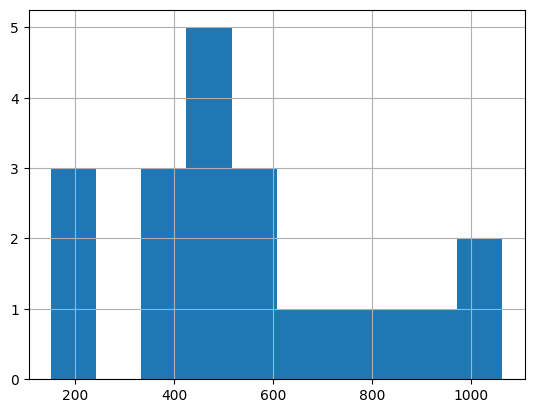

In [ ]:
df['Resumes'].str.split().map(lambda x: len(x)).hist()

Cleaning the data

In [ ]:
def clean_text(kit):
    kit=str(kit).lower()
    kit=re.sub(r"@\S+",r' ',kit)
    kit=re.sub('\[.*?\]',' ',kit)
    kit=re.sub("\s+",' ',kit)
    kit=re.sub("\n",' ',kit)
    re.sub(r'\s+[a-zA-Z]\s+', ' ', kit)
    kit=re.sub('[^a-zA-Z]',' ',kit)
    kit=re.sub('[''""]',' ',kit)
    kit=re.sub(r'\s+', ' ', kit, flags=re.I)
    letters=re.sub('[%s]'% re.escape(string.punctuation),'',kit)
    return letters

In [ ]:
df = pd.DataFrame(df['Resumes'].apply(lambda x: clean_text(x)))
df

,Resumes
0,data scientist align justify experience tanal...
1,kunika bhargav data science enthusiast with a...
2,present achievements achieved an in depth und...
3,work experience skill https github com gkapil...
4,timtim rahman m a n a g e m e n t g r a u a t ...
5,work experience farukh sharma sabudh foundatio...
6,abc kumar sinha data scientist technical exper...
7,contact information surili chawla chawlasurili...
8,asjihina mahajan iasshinamahajan summary a rec...
9,anmisha murarka anmishamurarka data science a...


Removing the Stop words

In [ ]:
nltk.download('stopwords')
stop_words=stopwords.words('english')
type(stop_words)
stop_words.extend(["n","x","xe","xa","xae","xc","using","mp","b","etc","and"])
# stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Resumes'] = df['Resumes'].apply(lambda x: ' '.join([kit for kit in x.split(' ') if kit not in stop_words]))
df

,Resumes
0,data scientist align justify experience tanal...
1,kunika bhargav data science enthusiast strong...
2,present achievements achieved depth understan...
3,work experience skill https github com gkapil...
4,timtim rahman g e e g r u e c contacts phone t...
5,work experience farukh sharma sabudh foundatio...
6,abc kumar sinha data scientist technical exper...
7,contact information surili chawla chawlasurili...
8,asjihina mahajan iasshinamahajan summary recen...
9,anmisha murarka anmishamurarka data science a...


Stemming and Lemmatizing

In [ ]:
st = PorterStemmer()
df['Resumes'] = df['Resumes'].apply(lambda x: [st.stem(kit) for kit in x])
df

,Resumes
0,"[ , d, a, t, a, , s, c, i, e, n, t, i, s, t, ..."
1,"[ , k, u, n, i, k, a, , b, h, a, r, g, a, v, ..."
2,"[ , p, r, e, s, e, n, t, , a, c, h, i, e, v, ..."
3,"[ , w, o, r, k, , e, x, p, e, r, i, e, n, c, ..."
4,"[t, i, m, t, i, m, , r, a, h, m, a, n, , g, ..."
5,"[w, o, r, k, , e, x, p, e, r, i, e, n, c, e, ..."
6,"[a, b, c, , k, u, m, a, r, , s, i, n, h, a, ..."
7,"[c, o, n, t, a, c, t, , i, n, f, o, r, m, a, ..."
8,"[a, s, j, i, h, i, n, a, , m, a, h, a, j, a, ..."
9,"[ , a, n, m, i, s, h, a, , m, u, r, a, r, k, ..."


In [ ]:
lemm = WordNetLemmatizer()
df['Resumes'] = df['Resumes'].apply(lambda x: [lemm.lemmatize(kit) for kit in x])

In [ ]:
df['Resumes'] = df['Resumes'].apply(lambda x: ''.join(x))

In [ ]:
df

,Resumes
0,data scientist align justify experience tanal...
1,kunika bhargav data science enthusiast strong...
2,present achievements achieved depth understan...
3,work experience skill https github com gkapil...
4,timtim rahman g e e g r u e c contacts phone t...
5,work experience farukh sharma sabudh foundatio...
6,abc kumar sinha data scientist technical exper...
7,contact information surili chawla chawlasurili...
8,asjihina mahajan iasshinamahajan summary recen...
9,anmisha murarka anmishamurarka data science a...


Most Frequent words

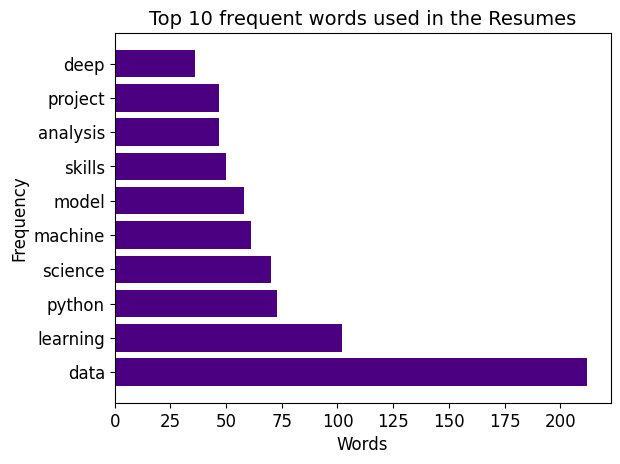

In [ ]:
words = []
kit = df['Resumes'].apply(lambda x: x.split(' '))
for i in kit:
  words+=i

data_freq = FreqDist(words).most_common(10)

import matplotlib.pyplot as plt
x,y = zip(*data_freq)
plt.barh(x,y,color='indigo')
plt.xlabel('Words',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 frequent words used in the Resumes",fontsize=14,color='k')
plt.show()


Checking the n-gram words

In [ ]:
wd = df['Resumes'].str.split()

wd = wd.values.tolist()

crp = [word for i in wd for word in i]

def word_ct(kit,n=1):
  count = Counter(ngrams(kit,n))
  return count

1 word

dict_items([(('data',), 212), (('scientist',), 13), (('align',), 1), (('justify',), 1), (('experience',), 35), (('tanalink',), 1), (('malaysia',), 4), (('engineered',), 1), (('heuristic',), 1), (('algorithms',), 25), (('monitor',), 3), (('enhance',), 4), (('quality',), 6), (('resulting',), 8), (('improved',), 12), (('accuracy',), 10), (('analysis',), 47), (('developed',), 22), (('module',), 2), (('identify',), 8), (('eliminate',), 1), (('bad',), 1), (('opencv',), 3), (('image',), 14), (('classification',), 23), (('designed',), 5), (('algorithm',), 7), (('accurately',), 2), (('map',), 3), (('vehicles',), 1), (('high',), 5), (('speed',), 3), (('motion',), 1), (('increasing',), 1), (('mapping',), 3), (('eda',), 13), (('geospatial',), 2), (('agronomic',), 1), (('datasets',), 3), (('assess',), 2), (('worker',), 1), (('performance',), 15), (('leading',), 4), (('productivity',), 1), (('research',), 32), (('intern',), 5), (('program',), 7), (('automate',), 4), (('planning',), 1), (('cargo',), 

[Text(0.5, 1.0, 'one-gram words')]

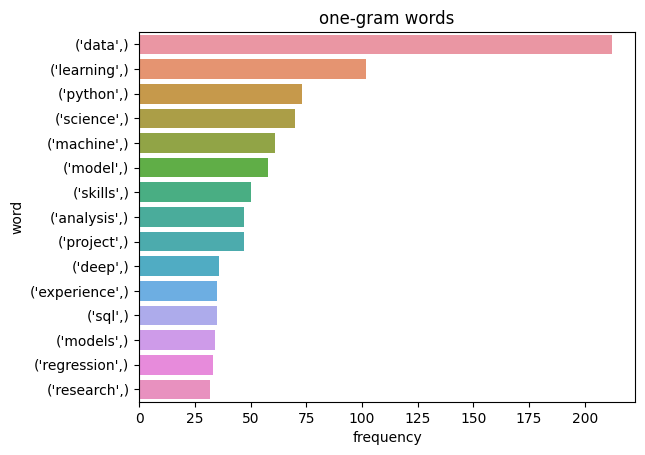

In [ ]:
word_ct(crp)
one_gram=word_ct(crp,1)
one_gram
print(one_gram.items())

freq1=pd.DataFrame(one_gram.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
bar1=freq1.head(15)


sns.barplot(x='frequency',y='word',data=bar1).set(title="one-gram words")

2 word (Bi-gram)

dict_items([(('data', 'scientist'), 13), (('scientist', 'align'), 1), (('align', 'justify'), 1), (('justify', 'experience'), 1), (('experience', 'tanalink'), 1), (('tanalink', 'malaysia'), 1), (('malaysia', 'engineered'), 1), (('engineered', 'heuristic'), 1), (('heuristic', 'algorithms'), 1), (('algorithms', 'monitor'), 1), (('monitor', 'enhance'), 1), (('enhance', 'data'), 1), (('data', 'quality'), 2), (('quality', 'resulting'), 1), (('resulting', 'improved'), 4), (('improved', 'accuracy'), 3), (('accuracy', 'data'), 1), (('data', 'analysis'), 13), (('analysis', 'developed'), 1), (('developed', 'module'), 1), (('module', 'identify'), 1), (('identify', 'eliminate'), 1), (('eliminate', 'bad'), 1), (('bad', 'data'), 1), (('data', 'opencv'), 1), (('opencv', 'image'), 1), (('image', 'classification'), 4), (('classification', 'resulting'), 1), (('resulting', 'accuracy'), 1), (('accuracy', 'designed'), 1), (('designed', 'algorithm'), 1), (('algorithm', 'accurately'), 1), (('accurately', 'map

[Text(0.5, 1.0, 'Bi-gram words')]

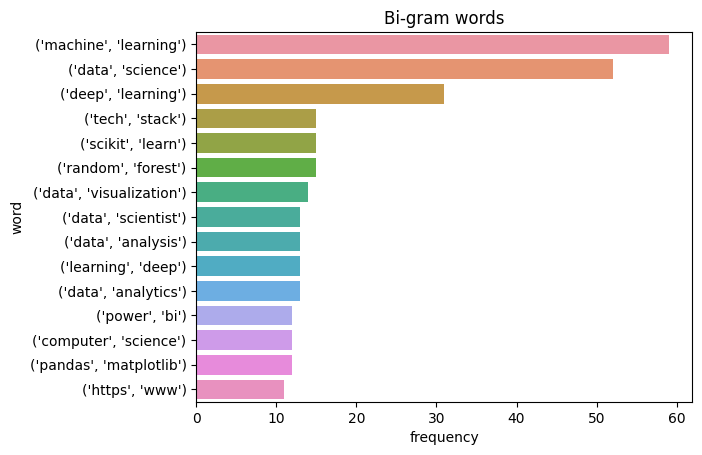

In [ ]:
bi_gram=word_ct(crp,2)
bi_gram
print(bi_gram.items())

freq2=pd.DataFrame(bi_gram.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
bar2=freq2.head(15)
print(bar2)


sns.barplot(x='frequency',y='word',data=bar2).set(title="Bi-gram words")

3 words (Tri-gram)

dict_items([(('data', 'scientist', 'align'), 1), (('scientist', 'align', 'justify'), 1), (('align', 'justify', 'experience'), 1), (('justify', 'experience', 'tanalink'), 1), (('experience', 'tanalink', 'malaysia'), 1), (('tanalink', 'malaysia', 'engineered'), 1), (('malaysia', 'engineered', 'heuristic'), 1), (('engineered', 'heuristic', 'algorithms'), 1), (('heuristic', 'algorithms', 'monitor'), 1), (('algorithms', 'monitor', 'enhance'), 1), (('monitor', 'enhance', 'data'), 1), (('enhance', 'data', 'quality'), 1), (('data', 'quality', 'resulting'), 1), (('quality', 'resulting', 'improved'), 1), (('resulting', 'improved', 'accuracy'), 1), (('improved', 'accuracy', 'data'), 1), (('accuracy', 'data', 'analysis'), 1), (('data', 'analysis', 'developed'), 1), (('analysis', 'developed', 'module'), 1), (('developed', 'module', 'identify'), 1), (('module', 'identify', 'eliminate'), 1), (('identify', 'eliminate', 'bad'), 1), (('eliminate', 'bad', 'data'), 1), (('bad', 'data', 'opencv'), 1), (('d

[Text(0.5, 1.0, 'Tri-gram words')]

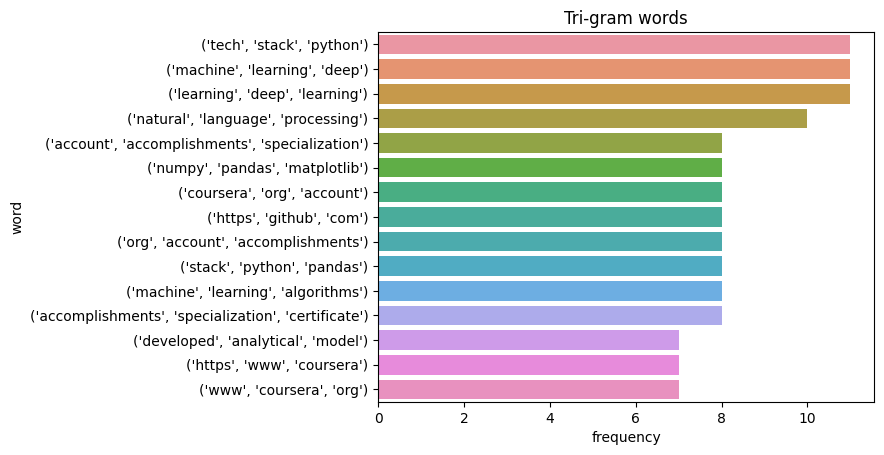

In [ ]:
tri_gram=word_ct(crp,3)
tri_gram
print(tri_gram.items())

freq3=pd.DataFrame(tri_gram.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
bar3=freq3.head(15)
print(bar3)

sns.barplot(x='frequency',y='word',data=bar3).set(title="Tri-gram words")

Word Cloud

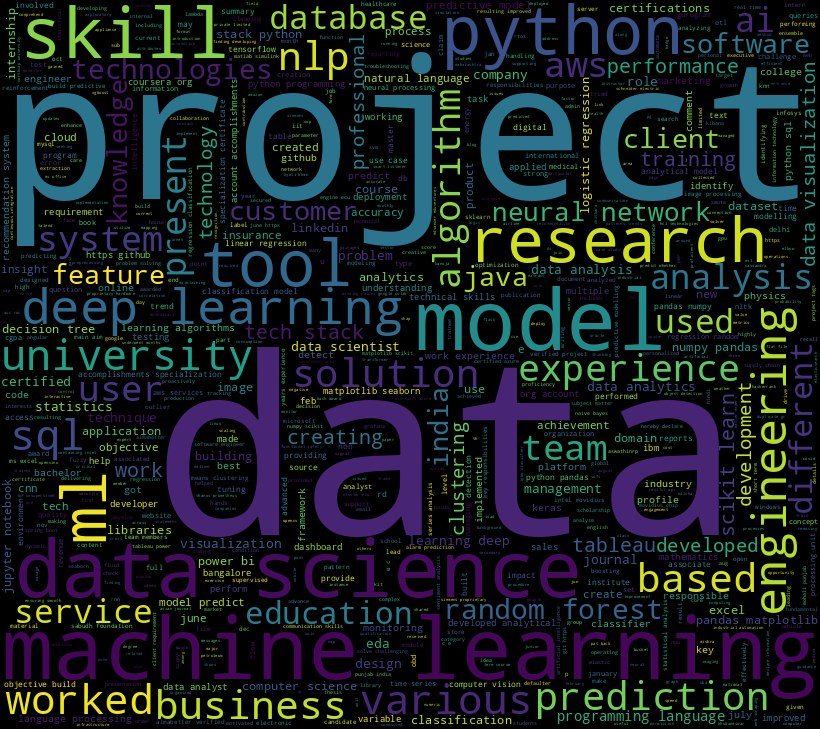

In [ ]:
wc=','.join(list(df['Resumes'].values))
background_image=np.array(Image.open('/content/drive/MyDrive/SampleDataset/mask12.png'))
wordcloud=WordCloud(background_color='black',max_words=1000,mask=background_image,width=1000,height=700)
img=wordcloud.generate_from_text(wc)
plot=img.to_image()
plot

Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vt = cv.fit(df['Resumes'])

# vt_df = pd.DataFrame(vt.toarray())
# vt_df

print(vt.vocabulary_)

{'data': 530, 'scientist': 1960, 'align': 84, 'justify': 1172, 'experience': 771, 'tanalink': 2184, 'malaysia': 1317, 'engineered': 729, 'heuristic': 988, 'algorithms': 83, 'monitor': 1426, 'enhance': 732, 'quality': 1783, 'resulting': 1891, 'improved': 1049, 'accuracy': 18, 'analysis': 98, 'developed': 603, 'module': 1418, 'identify': 1027, 'eliminate': 708, 'bad': 202, 'opencv': 1544, 'image': 1034, 'classification': 360, 'designed': 592, 'algorithm': 82, 'accurately': 20, 'map': 1328, 'vehicles': 2352, 'high': 990, 'speed': 2094, 'motion': 1437, 'increasing': 1063, 'mapping': 1329, 'eda': 681, 'geospatial': 904, 'agronomic': 67, 'datasets': 536, 'assess': 150, 'worker': 2407, 'performance': 1621, 'leading': 1233, 'productivity': 1734, 'research': 1870, 'intern': 1115, 'program': 1744, 'automate': 181, 'planning': 1652, 'cargo': 306, 'loads': 1275, 'airplane': 77, 'metaheuristic': 1385, 'reducing': 1834, 'computation': 432, 'time': 2234, 'simulated': 2040, 'demand': 571, 'supply': 21

Create dictionary with industrial and system engineering key terms by area

In [ ]:
terms = {'Data Scientist':['machine learning','statistical analysis','data wrangling','deep learning','natural language processing','nlp',
                           'visualization','scikit','numpy','pandas','cnn','knn','rnn','pca','k-means','gba','xg-boost','probability','linear algebra',
                           'data science','data analyst','models','power bi','python','recommendation system','web scraping','java','mysql','microsoft excel',
                           'business analytics','big data','business intelligence','ai','ml','seaborn','matplotlib','tableau','pysaprk','scipy',
                           'statsmodels','tensorflow','keras','framework','anaconda','git','jira','confluence','docker','jupyter notebook',
                           'scikit-learn','statistics','gcp','pytorch','neural networks','predictive analysis','clustering','boosting','random forests',
                           'svm','lda','linear regression','logistic regression','bs4','selenium','etl','kpi','algorithms','text processing','sentiment analysis',
                           'data','mongodb','prediction','predictive analysis','ai ml engineer','mlops','r','hadoop','oracle sql','teradata','hive',
                           'bitbucket','confusion matrix','auc','roc','lstm','gensim','nltk','spacy','iot','internet of things','django','rest',''],
         'Computer Vision':['computer vision','cv','machine learning','computer science','mediapipe','knn','kmeans','machine','computer'],
         'Content Writer':['b2b','b2c','cryptocurrency','seo research','seo','creative writing','social media','editing','proof reading','email marketing',
                           'communication','keeping deadlines','fact checking','content management software','web content development','adobe']}

Detecting the type of resume recieved based on the key words of the job role

In [ ]:
def get_target_variable(document, terms):
    for key, value in terms.items():
        for term in value:
            if term.lower() in document.lower():
                return key
    return None

In [ ]:
df['target'] = df['Resumes'].apply(lambda x: get_target_variable(x,terms))


In [ ]:
df['target']

0     Data Scientist
1     Data Scientist
2     Data Scientist
3     Data Scientist
4     Data Scientist
5     Data Scientist
6     Data Scientist
7     Data Scientist
8     Data Scientist
9     Data Scientist
10    Data Scientist
11    Data Scientist
12    Data Scientist
13    Data Scientist
14    Data Scientist
15    Data Scientist
16    Data Scientist
17    Data Scientist
18    Data Scientist
19    Data Scientist
Name: target, dtype: object

Since every resume taken out of the dataset are from Data Scientist role, and other role of Content Writer is not picked as the quality of resume is bad (i.e., even the words from the resume are not in a readable format) so left out from considering into data.

Scoring the Data Scientist Resumes based on key words used in a particular document or resume

In [ ]:
def score_resume(resume,terms):
  score = 0
  for key,value in terms.items():
    for term in value:
      if term.lower() in resume.lower():
        score += resume.lower().count(term.lower())
  return score

In [ ]:
df['score'] = df['Resumes'].apply(lambda x: score_resume(x,terms))

In [ ]:
df

,Resumes,target,score
6,abc kumar sinha data scientist technical exper...,Data Scientist,6425
7,contact information surili chawla chawlasurili...,Data Scientist,6408
10,kyoti khan email kyotikhan mobile research tec...,Data Scientist,6221
18,kanoja kumar mishra kanoj kanojkumar linkedin ...,Data Scientist,5412
5,work experience farukh sharma sabudh foundatio...,Data Scientist,4385
1,kunika bhargav data science enthusiast strong...,Data Scientist,3847
11,siddhi shukla mobile email sidhhishukla career...,Data Scientist,3620
4,timtim rahman g e e g r u e c contacts phone t...,Data Scientist,3352
2,present achievements achieved depth understan...,Data Scientist,3329
8,asjihina mahajan iasshinamahajan summary recen...,Data Scientist,2914


Scoring the resume in Descending order

In [ ]:
df_sort = df.sort_values('score',ascending=False)
df_sort

,Resumes,target,score
6,abc kumar sinha data scientist technical exper...,Data Scientist,6425
7,contact information surili chawla chawlasurili...,Data Scientist,6408
10,kyoti khan email kyotikhan mobile research tec...,Data Scientist,6221
18,kanoja kumar mishra kanoj kanojkumar linkedin ...,Data Scientist,5412
5,work experience farukh sharma sabudh foundatio...,Data Scientist,4385
1,kunika bhargav data science enthusiast strong...,Data Scientist,3847
11,siddhi shukla mobile email sidhhishukla career...,Data Scientist,3620
4,timtim rahman g e e g r u e c contacts phone t...,Data Scientist,3352
2,present achievements achieved depth understan...,Data Scientist,3329
8,asjihina mahajan iasshinamahajan summary recen...,Data Scientist,2914


Saving these sorted resumes based on scores into a folder

In [ ]:
directory = "/content/drive/MyDrive/SampleDataset/SortedResumes"

if not os.path.exists(directory):
  os.makedirs(directory)


In [ ]:
for index,row in df_sort.iterrows():
  res = row['Resumes']
  filename = os.path.join(directory,f"{row['score']}.pdf")
  with open(filename,"w") as file:
    file.write(res)